# Multiple learning curves


In [4]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import numpy as np
import matplotlib.pyplot as plt
from srcs.modules.optimizer import SGD, Adam

from srcs.modules.functions import Softmax, np_log, numerical_gradient
from srcs.modules.activation import ReLU, Sigmoid
from srcs.modules.loss import CrossEntropyLoss
from srcs.modules.init import he_normal, xavier_normal, normal

from srcs.modules.layer import Dense
from srcs.modules.model import Sequential
from srcs.modules.plot import plot_multiple_models
from srcs.dataloader import get_wdbc, train_test_split
from srcs.train import train_model, create_model
from srcs import train
from srcs.modules.io import get_ndarray

seed = 42

In [5]:
X, y = get_ndarray(
    wdbc_csv_path="../data/data.csv",
    y_onehot=True,
    drop_id=True,
    apply_normalize=False,
)

test_size = 0.2
shuffle = False
random_state = 42
X_train, X_valid, t_train, t_valid = train_test_split(
    X=X,
    y=y,
    test_size=test_size,
    shuffle=shuffle,
    random_state=random_state,
    stratify=True,
)

type(X): <class 'numpy.ndarray'>



train Model_Small
 Training WDBC...
  X_train shape: (456, 30)
  X_valid shape: (113, 30)


 Metrics: 
  Train loss:0.2068 [Accuracy:0.9452, Precision:0.9503, Recall:0.9000, F1:0.9245]
  Valid loss:0.2495 [Accuracy:0.9204, Precision:0.9714, Recall:0.8095, F1:0.8831]


train Model_Mid
 Training WDBC...
  X_train shape: (456, 30)
  X_valid shape: (113, 30)


 Metrics: 
  Train loss:0.0689 [Accuracy:0.9693, Precision:0.9815, Recall:0.9353, F1:0.9578]
  Valid loss:0.1445 [Accuracy:0.9292, Precision:0.9474, Recall:0.8571, F1:0.9000]


train Model_Big
 Training WDBC...
  X_train shape: (456, 30)
  X_valid shape: (113, 30)


 Metrics: 
  Train loss:0.0453 [Accuracy:0.9825, Precision:0.9880, Recall:0.9647, F1:0.9762]
  Valid loss:0.1356 [Accuracy:0.9469, Precision:0.9091, Recall:0.9524, F1:0.9302]



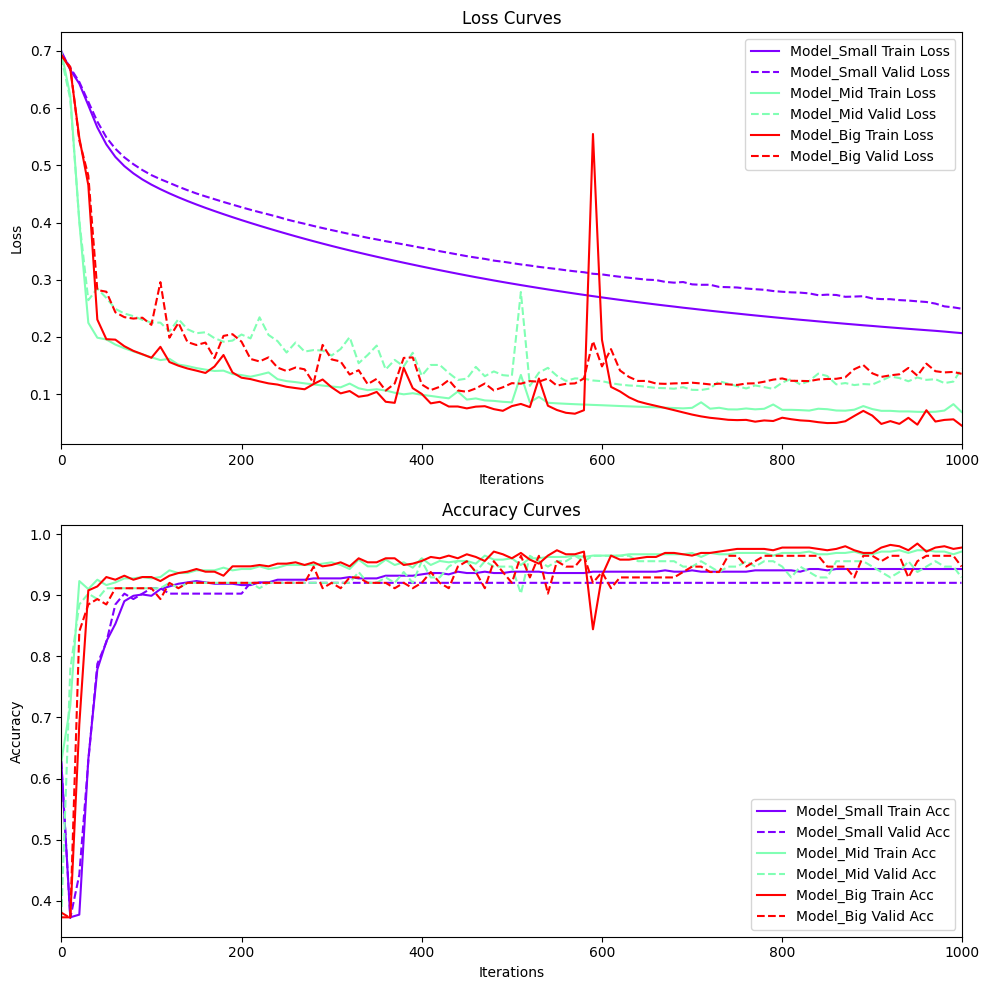

In [6]:
model_small = Sequential(
    layers=[
        Dense(in_features=30, out_features=5, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=5, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

model_mid = Sequential(
    layers=[
        Dense(in_features=30, out_features=100, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=100, out_features=50, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

model_big = Sequential(
    layers=[
        Dense(in_features=30, out_features=300, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=300, out_features=200, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=200, out_features=100, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=100, out_features=50, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

models = {
    "Model_Small"  : model_small,
    "Model_Mid"    : model_mid,
    "Model_Big"    : model_big,
}


models_results = []
max_itr = 1000
for name, model in models.items():
    print(f"\ntrain {name}")
    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=model,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        metrics_interval=10,
        name="WDBC"
    )

    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)



train Model_ReLU
 Training WDBC...
  X_train shape: (456, 30)
  X_valid shape: (113, 30)


 Metrics: 
  Train loss:0.0847 [Accuracy:0.9649, Precision:0.9583, Recall:0.9471, F1:0.9527]
  Valid loss:0.1219 [Accuracy:0.9292, Precision:0.9474, Recall:0.8571, F1:0.9000]


train Model_Sigmoid
 Training WDBC...
  X_train shape: (456, 30)
  X_valid shape: (113, 30)


 Metrics: 
  Train loss:0.0668 [Accuracy:0.9737, Precision:0.9759, Recall:0.9529, F1:0.9643]
  Valid loss:0.1010 [Accuracy:0.9381, Precision:0.9487, Recall:0.8810, F1:0.9136]



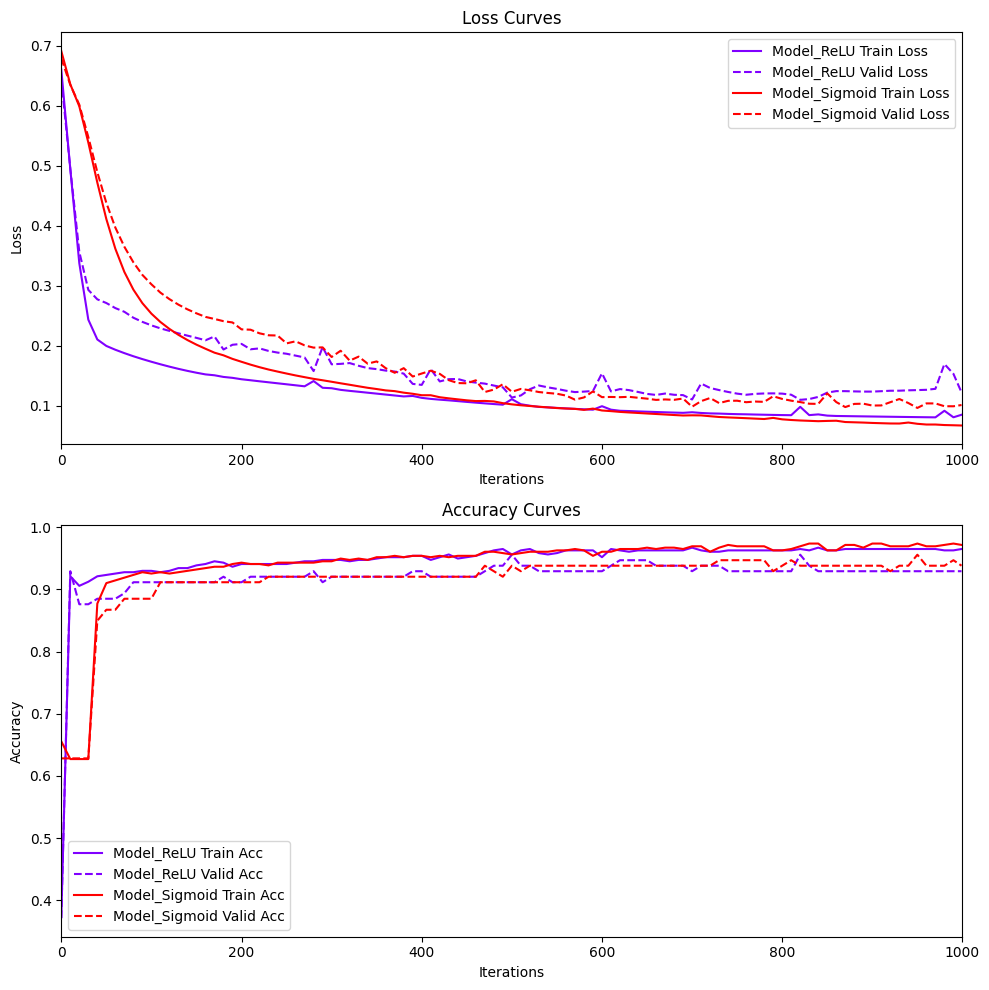

In [7]:
model_relu = Sequential(
    layers=[
        Dense(in_features=30, out_features=50, activation=ReLU, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

model_sigmoid = Sequential(
    layers=[
        Dense(in_features=30, out_features=50, activation=Sigmoid, init_method=normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.001),
)

models = {
    "Model_ReLU"    : model_relu,
    "Model_Sigmoid" : model_sigmoid,
}


models_results = []
max_itr = 1000
for name, model in models.items():
    print(f"\ntrain {name}")
    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=model,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        metrics_interval=10,
        name="WDBC"
    )

    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)
